Nama: Alyza Rahima Pramudya <br>NIM: 2502032125

# **Video**

---
Video penjelasan bisa diakses melalui link berikut: https://youtu.be/zZbLkgUwIFY



# **A) Question**

---
Untuk memenuhi task ini anda perlu mengumpulkan sebanyak minimal 10 data teks berita yang berasal dari media digital seperti liputan 6, detik.com dan lain-lain dengan kategori berita politik atau olahraga atau hiburan. Data ini harus berasal minimal dari 3 media yang berbeda dan anda melakukan pelabelan secara manual


# **B) Import & Install all Requirments**

---
Karena kita perlu mengumpulkan teks berita untuk 3 media yang berbeda maka disini saya berencana untuk mengumpulkan teks beritanya dengan melakukan web scraping menggunakan **GoogleNews** dan **newspaper3k**. Oleh karena itu pada tahapan ini kita perlu untuk terlebih dahulu menginstall dan mengimport library yang diperlukan:<br>


1. **!pip install GoogleNews:** menginstall library GoogleNews untuk mendapatkan link beritanya
2. **!pip install newspaper3k:** menginstall library newspaper3k untuk ekstraksi teks berita dari link yang telah dikumpulkan
3. **import newspaper:** import library newspaper yang sudah diinstall
4. **import numpy as np:** import library numpy untuk hal-hal yang berhubungan dengan numerik
5. **import pandas as pd:** import library pandas untuk melakukan manipulasi dan analisis data
6. **from newspaper import article:** import modul article untuk ekstraksi berita
7. **from GoogleNews import GoogleNews:** import modul GoogleNews untuk mendapatkan link berita dari google
   




In [ ]:
!pip install GoogleNews

In [ ]:
!pip install newspaper3k

In [ ]:
import newspaper
import numpy as np
import pandas as pd
from newspaper import Article
from GoogleNews import GoogleNews

# **C) Get All Article Links**

---
Setelah kita import library dan modul yang akan digunakan selanjutnya adalah kita perlu untuk mengumpulkan link article/berita yang mau kita ekstrak isi beritanya

**1. Set up GoogleNews**<br>
Pertama-tama kita perlu set dulu agar nanti google akan searchnya berita yang berbahasa indonesia dan diterbitkan di indonesia. Lalu karena pada soal disebutkan minimal hanya 10 berita maka kita akan set rentang waktunya dari tanggal 1 sep 2023 - 31 okt 2023 saja. Alasan saya menentukan rentang waktu adalah agar nantinya kemungkinan berita yang muncul dari tiap media itu bahasnya sama. Misal di 1 bulan terkahir ini pasti untuk kategori politik baik itu di kompas, detik, dll pasti bahasnya kebanyakan tentang pemilu, sehingga nantinya saya berharap model akan bisa belajar bahwa pemilu itu pasti kategorinya politik.

In [ ]:
google = GoogleNews(lang="id", region="id")
google.set_time_range('9/01/2023','10/31/2023')

Selanjutnya kita akan buatkan dahulu list apa aja yang akan kita search beritanya. Karena pada soal kita perlu mendapatkan berita dengan kategori olahraga, politik, dan hiburan dari minimal 3 media indonesia yang berbeda maka pada list yang pertama kita akan cari dari **kompas.com, pikiran-rakyat.com, tribunnews.com, dan merdeka.com** beserta keywordnya.

<br> selanjutnya pada categoryList kita akan sesuaikan dengan searchTermList, di indeks ke-0 pada searchTermList adalah kompas.com/sports oleh karena itu di searchTermListnya kita akan masukan berita hasil search dengan search term 'kompas.com/sports' ke kategori Olahraga. Karena pada soal pelabelan harus dilakukan secara manual, maka nantinya setelah semua berita didapatkan kita tetap akan cek lagi apakah labelnya sesuai.

In [ ]:
searchTermList = ['kompas.com/sports', 'nasional.kompas.com', 'kompas.com/hype', 'pikiran-rakyat.com/nasional', 'pikiran-rakyat.com/olahraga', 'pikiran-rakyat.com/entertainment', 'tribunnews.com/mata-lokal-memilih', 'tribunnews.com/sport', 'tribunnews.com/lifestyle', 'merdeka.com/politik', 'merdeka.com/olahraga', 'merdeka.com/artis']
categoryList = ['olahraga', 'politik', 'hiburan', 'politik', 'olahraga', 'hiburan', 'politik', 'olahraga', 'hiburan', 'politik', 'olahraga', 'hiburan']

**2. Search Berita dan simpan ke dalam bentuk dataframe**<br>
Pada tahapan ini kita akan *search semua berita berdasarkan searchTermList* dan melakukan *pelabelan berdasarkan category list*.

<br>Untuk 1 search term nantinya akan terbentuk 1 buah data frame oleh karena itu tahapan pertamanya adalah kita akan membentuk list kosong bernama **df_list** untuk menampung semua df yang terbentuk. lalu selanjutnya kita akan melakukan iterasi berdasarkan **searchTermList** dan **categoryList**, lalu kita akan melakukan pencarian google menggunakan **google.search** dan mengambil informasi berupa **title, media, date, datetime, desc, link, dan img** untuk setiap berita yang ada pada ***halaman pertama saja*** pada hasil pencarian google.

<br>Selanjutnya hasil pencarian tersebut kita simpan ke list kosong bernama **result_list** yang nantinya akan kita gabungkan menjadi 1 buah dataframe bernama **df** dan kita tambahkan kolom category dengan value sesuai dengan category yang ada pada indeks yang sedang di iterasi pada **categoryList** lalu terakhir kita simpan df ke list kosong bernama **df_list** yang sudah kita bentuk diawal.

<br>Alasan kenapa kita hanya akan mengambil berita pada halaman pertama saja dari hasil pencarian adalah karena kita hanya perlu minimal 10 data, sehingga dengan cara ini kita berencana untuk mendapatkan 10 berita per media dan per kategori sehingga nantinya total kita akan mendapat 120 berita.

In [ ]:
df_list = []

for searchTerm, category in zip(searchTermList, categoryList):
    result_list = []
    google.search(searchTerm)

    search = google.page_at(1)
    result_list.append(search)

    df = pd.concat([pd.DataFrame(result) for result in result_list], ignore_index=True)
    df['category'] = category
    df_list.append(df)

Selanjutnya setalah kita mempunyai 12 list data frame pada **df_list** kita akan menggabungkan semua data frame tersebut menjadi 1 buah data frame bernama **df_all**.

<br>lalu kita coba tampilkan semua data frame tersebut dan sesuai dengan yang kita inginkan kita sudah mendapatkan category sesuai dengan search term yang digunakan dan sekilas label pada kolom category sudah sesuai dengan title beritanya.

In [ ]:
df_all = pd.concat(df_list, ignore_index=True)
df_all

,title,media,date,datetime,desc,link,img,category
0,Alasan Rivan Nurmulki Absen pada Livoli 2023 -...,Kompas.com,2 hari lalu,NaN,,https://www.kompas.com/sports/read/2023/11/02/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",olahraga
1,Presiden FIFA Resmi Umumkan Arab Saudi Tuan Ru...,Kompas.com,3 hari lalu,NaN,,https://www.kompas.com/sports/read/2023/11/01/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",olahraga
2,"Klasemen Liga 1: Borneo FC ke Puncak, Persib N...",Kompas.com,6 hari lalu,NaN,,https://www.kompas.com/sports/read/2023/10/28/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",olahraga
3,Sejarah Rifda Irfanaluthfi Tembus Olimpiade 20...,Kompas.com,bulan lalu,NaN,,https://www.kompas.com/sports/read/2023/10/03/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",olahraga
4,Klasemen Medali Asian Games 2022: Indonesia di...,KOMPAS.com,bulan lalu,NaN,,https://www.kompas.com/sports/read/2023/10/03/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",olahraga
...,...,...,...,...,...,...,...,...
115,"Selain Raisa, Ini Deretan Artis yang Nonton Ko...",Merdeka.com,bulan lalu,NaN,,https://www.merdeka.com/jateng/selain-raisa-in...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",hiburan
116,Diah Permatasari Jalan-Jalan sama Anaknya yang...,Merdeka.com,bulan lalu,NaN,,https://www.merdeka.com/artis/diah-permatasari...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",hiburan
117,"Artis Nindy Ayunda Datangi Mabes Polri, Siap D...",Merdeka.com,bulan lalu,NaN,,https://www.merdeka.com/peristiwa/artis-nindy-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",hiburan
118,"Tinggi & Ganteng, ini Kriteria Pacar Marco Put...",Merdeka.com,bulan lalu,NaN,,https://www.merdeka.com/artis/tinggi-amp-gante...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",hiburan


# **D) Check the links**

---
Selanjutnya kita akan melakukan pengecekan pada semua berita yang kita miliki untuk memastikan bahwa kita punya masing-masing 30 berita untuk setiap media dan 40 berita untuk setiap kategori.

**1. Cek Jumlah Kategori**<br>
Sesuai dengan yang kita harapkan label pada kolom category masing-masing memiliki jumlah berita yang sama, yaitu 40 berita untuk setiap label. hal ini kita sengaja lakukan agar class nya tidak imbalance dan membuat model kita jadi cenderung menebak ke 1-2 kategori saja yang memiliki jumlah berita lebih banyak.

In [ ]:
df_all['category'].value_counts()

olahraga    40
politik     40
hiburan     40
Name: category, dtype: int64

**2. Ubah nama media sesuai dengan link berita** <br>
Selanjutnya seperti yang kita lihat pada output df_all kita bisa melihat bahwa secara sekilas nama-nama medianya itu beda-beda ada yang **kompas.com** dan ada juga yang **KOMPAS.com**, oleh karena itu kita akan samakan dulu nama medianya. dengan cara melihat dari link beritanya. Apabila pada link terdapat kata-kata kompas.com maka ganti value pada kolom media menjadi Kompas, begitupun untuk media yang lainnya.

<br>Alasan saya melakukan hal ini adalah karena saya ingin memastikan bahwa data kita hanya berasal dari media-media yang kita mau saja yaitu kompas, tribun, PR, dan merdeka.

In [ ]:
def update_media(row):
    if 'kompas.com' in row['link']:
        return 'Kompas'
    elif 'tribunnews.com' in row['link']:
        return 'Tribun News'
    elif 'pikiran-rakyat.com' in row['link']:
        return 'Pikiran Rakyat'
    elif 'merdeka.com' in row['link']:
        return 'Merdeka'
    else:
        return row['media']

df_all['media'] = df_all.apply(update_media, axis=1)

**3. Cek jumlah media**<br>
Sesuai dugaan, ternyata benar bahwa ada berita yang bukan berasal dari media yang kita inginkan yaitu media bernama **Radar Cirebon TV**.

In [ ]:
df_all['media'].value_counts()

Kompas              30
Tribun News         30
Merdeka             30
Pikiran Rakyat      29
Radar Cirebon TV     1
Name: media, dtype: int64

**4. Cek link dan category berita dari media yang bukan kita inginkan**<br>
Sebelum diganti, kita perlu cek dulu apakah benar Radar Cirebon TV ini bukan dari salah satu media yang kita inginkan? karena dibeberapa media memang mereka memiliki link dengan awalan nama kota tempat berita itu terjadi.

<br>Namun, setelah dicek ternyata memang bukan dari media yang kita inginkan oleh karena itu kita perlu menghapus berita ini dari df_all dan kit carikan berita dengan kategori olahraga

In [ ]:
df_check = df_all[df_all['media'] == 'Radar Cirebon TV'][['link', 'category']]
df_check

,link,category
40,https://www.radarcirebon.tv/2023/11/04/resmi-v...,olahraga


**5. Hapus berita yang berasal dari media lain dari dataframe**<br>
Pada tahapan ini kita akan hapus berita tersebut dengan cara memilih data dengan data yang medianya bukan **'Radar Cirebon TV'** lalu kita simpan kedalam data frame dengan nama sama, yaitu **df_all**



In [ ]:
df_all = df_all[df_all['media'] != 'Radar Cirebon TV']

**6. Cek apakah berita sudah dihapus**<br>
Pada tahapan ini kita akan hitung berapa jumlah data untuk setiap media dan memang data untuk media 'Radar Cirebon TV' sudah dihapus sehingga sekarang kita kekurangan 1 berita berkategori Olahraga dari media Pikiran Rakyat.

In [ ]:
df_all['media'].value_counts()

Kompas            30
Tribun News       30
Merdeka           30
Pikiran Rakyat    29
Name: media, dtype: int64

**7. Cek apakah link berita pengganti belum ada di data frame**<br>
Pada tahapan ini kita akan cek apakah link berita pengganti tadi sudah ada di data frame atau belum karena saya tidak mau berita nya double. Alasan saya tidak mau double adalah karena saya ingin memperbanyak kata-kata yang bisa dipelajari oleh model saya.

<br> Setelah dicek, ternyata link tersebut belum ada di data frame jadi kita bisa tambahkan ke data frame

In [ ]:
df_all[df_all['link'] == "https://www.pikiran-rakyat.com/olahraga/pr-01376956/pon-papua-ditunda-tim-atletik-jabar-tetap-jalankan-arahan-koni"]

,title,media,date,datetime,desc,link,img,category


**8. Menambahkan berita pengganti ke data frame**<br>
Pada tahapan ini kita masukan berita pengganti ke dalam data frame. Kita isi date, datetime, desc, dan img menjadi NaN karena nantinya kita tidak memerlukan data tersebut sehingga kita isi kosong saja.


In [ ]:
from pandas.core.dtypes.missing import notnull
new_row = {
    'title': 'PON Papua Ditunda, Tim Atletik Jabar Tetap Jalankan Arahan KONI',
    'media': 'Pikiran Rakyat',
    'date': np.nan,
    'datetime': np.nan,
    'desc': np.nan,
    'link': 'https://www.pikiran-rakyat.com/olahraga/pr-01376956/pon-papua-ditunda-tim-atletik-jabar-tetap-jalankan-arahan-koni',
    'img': np.nan,
    'category': 'olahraga'
}

df_all = df_all.append(new_row, ignore_index=True)


<ipython-input-25-f5035c3b9e2b>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(new_row, ignore_index=True)


**9. Cek apakah berita pengganti sudah masuk ke data frame**<br>
Pada tahap ini kita cek apakah berita pengganti sudah masuk ke data frame dan ternyata sudah.

In [ ]:
df_all[df_all['link'] == "https://www.pikiran-rakyat.com/olahraga/pr-01376956/pon-papua-ditunda-tim-atletik-jabar-tetap-jalankan-arahan-koni"]

,title,media,date,datetime,desc,link,img,category
119,"PON Papua Ditunda, Tim Atletik Jabar Tetap Jal...",Pikiran Rakyat,NaN,NaN,NaN,https://www.pikiran-rakyat.com/olahraga/pr-013...,NaN,olahraga


**10. Hitung kembali jumlah berita tiap media**<br>
Pada tahapan ini kita cek lagi apakah benar semua media sudah memiliki masing-masing 30 berita, dan ternyata sudah.

In [ ]:
df_all['media'].value_counts()

Kompas            30
Pikiran Rakyat    30
Tribun News       30
Merdeka           30
Name: media, dtype: int64

**11. Rapihkan label pada kolom category**<br>
Disini saya ingin merapihkan label pada kolom category menjadi huruf kapital di awal kata agar lebih nyaman dilihat. Sebelumnya saya lupa ketika melakukan pengambilan berita tidak langsung kategorinya dalam huruf kapital.

In [ ]:
df_all['category'] = df_all['category'].replace({'olahraga': 'Olahraga', 'politik': 'Politik', 'hiburan': 'Hiburan'})

**12. Cek tiap label**<br>
Sekarang label di kolom category semuanya sudah menggunakan huruf kapital di awal kata sehingga saya lebih nyaman melihat datanya

In [ ]:
df_all['category'].value_counts()

Olahraga    40
Politik     40
Hiburan     40
Name: category, dtype: int64

**13. Sort berita berdasarkan category & media**<br>
Pada tahapan ini kita sort asc datanya berdasarkan category lalu sort berdasarkan media agar datanya bisa lebih rapih

In [ ]:
df_all = df_all.sort_values(by=['category', 'media'], ascending=True)
df_all = df_all.reset_index(drop=True)
df_all

,title,media,date,datetime,desc,link,img,category
0,"Jungkook Rilis Album Solo Perdana, Golden Hala...",Kompas,1 hari lalu,NaN,,https://www.kompas.com/hype/read/2023/11/03/09...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Hiburan
1,"Tak Mau Disebut Serakah, Inara Jelaskan Alasan...",Kompas,1 hari lalu,NaN,,https://www.kompas.com/hype/read/2023/11/03/08...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Hiburan
2,"Pernah Jadi Pacar Prilly Latuconsina, Kiki TBA...",Kompas,2 hari lalu,NaN,,https://www.kompas.com/hype/read/2023/11/01/14...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Hiburan
3,Polisi Ungkap Fakta Baru di Balik Kematian Mat...,Kompas,2 hari lalu,NaN,,https://www.kompas.com/hype/read/2023/11/01/14...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Hiburan
4,Matthew Perry Ditemukan Meninggal di Bak Jaccu...,Kompas,5 hari lalu,NaN,,https://www.kompas.com/hype/read/2023/10/29/17...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Hiburan
...,...,...,...,...,...,...,...,...
115,Arsjad Rasjid Buka Pintu Bagi Erick Thohir unt...,Tribun News,2 hari lalu,NaN,,https://www.tribunnews.com/mata-lokal-memilih/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Politik
116,"TPN Bentuk Tim Pemenangan Muda Ganjar-Mahfud, ...",Tribun News,2 hari lalu,NaN,,https://www.tribunnews.com/mata-lokal-memilih/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Politik
117,Hakim Konstitusi Sampai Menangis saat Diperiks...,Tribun News,3 hari lalu,NaN,,https://www.tribunnews.com/mata-lokal-memilih/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Politik
118,PDIP Bongkar Sederet Elite Politik yang Diduga...,Tribun News,4 hari lalu,NaN,,https://www.tribunnews.com/mata-lokal-memilih/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Politik


**14. Drop kolom selain kolom title, media, link, dan category**<br>
Pada tahapan ini kita drop kolom selain kolom title, media, link, dan category karena kita memerlukan data pada kolom-kolom yang lain. kita drop dengan hanya memilih kolom title, media, link, dan category lalu kita simpan ke data frame dengan nama yang sama yaitu df_all

In [ ]:
df_all = df_all.loc[:, ['title', 'media', 'link', 'category']]
df_all

,title,media,link,category
0,"Jungkook Rilis Album Solo Perdana, Golden Hala...",Kompas,https://www.kompas.com/hype/read/2023/11/03/09...,Hiburan
1,"Tak Mau Disebut Serakah, Inara Jelaskan Alasan...",Kompas,https://www.kompas.com/hype/read/2023/11/03/08...,Hiburan
2,"Pernah Jadi Pacar Prilly Latuconsina, Kiki TBA...",Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,Hiburan
3,Polisi Ungkap Fakta Baru di Balik Kematian Mat...,Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,Hiburan
4,Matthew Perry Ditemukan Meninggal di Bak Jaccu...,Kompas,https://www.kompas.com/hype/read/2023/10/29/17...,Hiburan
...,...,...,...,...
115,Arsjad Rasjid Buka Pintu Bagi Erick Thohir unt...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik
116,"TPN Bentuk Tim Pemenangan Muda Ganjar-Mahfud, ...",Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik
117,Hakim Konstitusi Sampai Menangis saat Diperiks...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik
118,PDIP Bongkar Sederet Elite Politik yang Diduga...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik


**15. Download data sebagai csv**<br>
Terakhir kita download datanya sebagai dfALlLink.csv untuk mencegah jika runtime terputus dan kita harus mengulang proses search beritanya lagi.

In [ ]:
df_all.to_csv('dfAllLink.csv', index=False)

# **E) Get All Article Content/Teks**

---
Pada tahap ini library newspaper akan mulai digunakan karena pada tahap ini kita akan memulai untuk mengekstrak konten/teks dari berita yang ada pada link-link yang sudah kita kumpulkan sebelumnya.

**1. Ekstrak Konten Berita**<br>
Pada tahap ini kita akan mengekstrak konten/teks dari link berita yang sudah kita kumpulkan dengan menerapkan fungsi **get_text** ke setiap baris kolom **‘link’** dari dataframe **df_all** dan menyimpan hasilnya ke kolom baru bernama **‘text’**:<br>
1. nantinya ketika url dari kolom link masuk ke fungsi **get_text**, kita akan membuat sebuah objek bernama article dari library newspaper3k dengan url tadi dan mengatur bahasanya jadi bahasa indonesia
2. lalu dengan menggunakan fungsi **dowload()** kita akan mencoba mendownload konten dari url yang tadi
3. lalu dengan menggunakan fungsi **parse()** kita akan mencoba mengurai konten dari url yang tadi
4. jika berhasil maka fungsi **get_text** akan mengembalikan teks berita dan akan disimpan di kolom **text** pada **df_all**
5. tapi jika terjadi kesalahan dalam mendownload atau mengurai konten dari url yang diberikan maka akan di print pesan **"failed to download and parse {url}'** dan fungsi **get_text** akan mengambalikan **None**

dan ternyata semua link yang diberikan itu tidak ada yang berhasil di download satupun, sehingga saya pun mencoba membuka linknya satu persatu, namun hasilnya nihil, dicopy paste manualpun linknya tetap beritanya tidak bisa dibuka seperti ini<br>
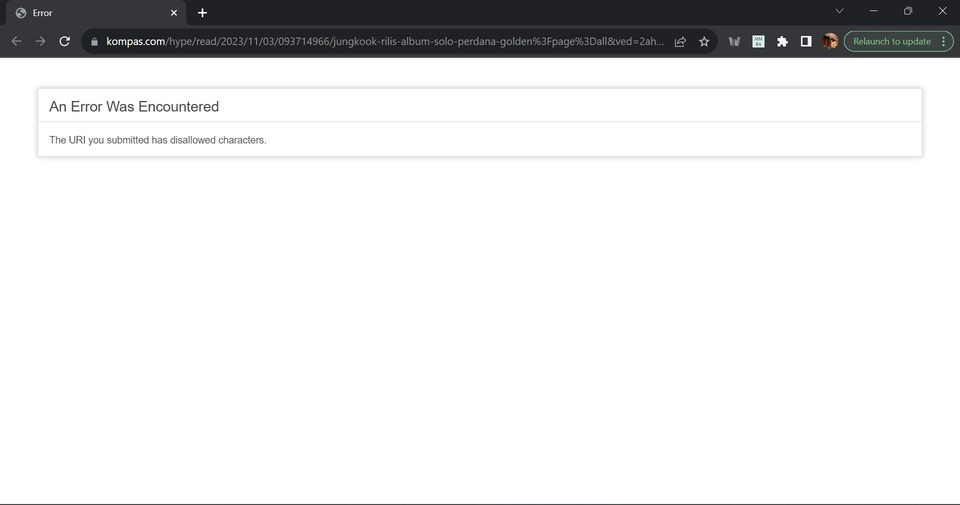

In [ ]:
def get_text(url):
    article = Article(url, language='id')
    try:
        article.download()
        article.parse()
        return article.text
    except:
        print(f"Failed to download and parse {url}")
        return None

df_all['text'] = df_all['link'].apply(get_text)

Failed to download and parse https://www.kompas.com/hype/read/2023/11/03/093714966/jungkook-rilis-album-solo-perdana-golden%3Fpage%3Dall&ved=2ahUKEwi94uOr6qmCAxWCEFkFHQdkAukQxfQBegQIBxAC&usg=AOvVaw3i4RlPDh4M8Zi0rh1P7cXH
Failed to download and parse https://www.kompas.com/hype/read/2023/11/03/083603266/tak-mau-disebut-serakah-inara-jelaskan-alasan-tuntut-virgoun-nafkah-anak-rp%3Fpage%3Dall&ved=2ahUKEwi94uOr6qmCAxWCEFkFHQdkAukQxfQBegQICRAC&usg=AOvVaw2VJS1DzsSs5d-FLUwR0ovm
Failed to download and parse https://www.kompas.com/hype/read/2023/11/01/145726966/pernah-jadi-pacar-prilly-latuconsina-kiki-tba-beberkan-tanggapan-kekasihnya&ved=2ahUKEwi94uOr6qmCAxWCEFkFHQdkAukQxfQBegQIAhAC&usg=AOvVaw3Jeouw1g6PdE5_QmAXQUTT
Failed to download and parse https://www.kompas.com/hype/read/2023/11/01/145125766/polisi-ungkap-fakta-baru-di-balik-kematian-matthew-perry&ved=2ahUKEwi94uOr6qmCAxWCEFkFHQdkAukQxfQBegQIABAC&usg=AOvVaw0KlAt3Jc5isjYsOXxdekc6
Failed to download and parse https://www.kompas.com/hype/rea

Karena linknya sama sekali tidak ada yang bisa dibuka secara manual saya akhirnya membuka kembali data data frame df_All yang sudah saya download sebelumnya sebagai dfAllLink.csv

<br> Saya perhatikan hampir semua link itu punya patternnya dan saya coba linknya jadi seperti ini, karena setelah saya coba jika dihapus seperti ini link tersebut saya bisa buka secara manual:<br><br>
**Link Awal**
```
1. https://www.kompas.com/hype/read/2023/11/03/093714966/jungkook-rilis-album-solo-perdana-golden%3Fpage%3Dall&ved=2ahUKEwi94uOr6qmCAxWCEFkFHQdkAukQxfQBegQIBxAC&usg=AOvVaw3i4RlPDh4M8Zi0rh1P7cXH
2. https://www.merdeka.com/artis/aktor-indonesia-berbakat-ini-berhasil-jadi-pasangan-hidup-sherina-munaf-siapakah-dia-43570-mvk.html&ved=2ahUKEwiLncWv6qmCAxWNMVkFHaLYAFUQxfQBegQICBAC&usg=AOvVaw1fEw3FJv-DtbKyqBKy3B9V
```

**Link Setelahnya**
```
1. https://www.kompas.com/hype/read/2023/11/03/093714966/jungkook-rilis-album-solo-perdana-golden%3Fpage%3Dall
2. https://www.merdeka.com/artis/aktor-indonesia-berbakat-ini-berhasil-jadi-pasangan-hidup-sherina-munaf-siapakah-dia-43570-mvk.html
```

<br> Jadi pokoknya kita akan hapus mulai dari ada kata-kata **&ved**. Lalu setelah saya cari tau ternyata **&ved** ini adalah parameter url yang digunakan oleh Google untuk pelacakan klik dalam hasil pencarian mereka jadi parameter ini ga diperluin dan malah bisa kena error.


Masalahnya adalah saya lupa bahwa saya bisa menghapusnya menggunakan python, namun karena saya sudah terlanjur membersihkan linknya secara manual di excel jadinya saya save excelnya dan saya convert lagi ke csv dengan nama **dfAllClean_Ved.csv**

**2. Load data yang linknya sudah dibersihkan**<br>
Pada tahap ini kita kembali me-load data yang linknya sudah diberishkan dari parameter **&ved** dan menyimpannya dalam data frame bernama **df_all**

In [ ]:
df_all = pd.read_csv('/content/dfAllClean_Ved.csv')
df_all

,title,media,link,category
0,"Jungkook Rilis Album Solo Perdana, Golden Hala...",Kompas,https://www.kompas.com/hype/read/2023/11/03/09...,Hiburan
1,"Tak Mau Disebut Serakah, Inara Jelaskan Alasan...",Kompas,https://www.kompas.com/hype/read/2023/11/03/08...,Hiburan
2,"Pernah Jadi Pacar Prilly Latuconsina, Kiki TBA...",Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,Hiburan
3,Polisi Ungkap Fakta Baru di Balik Kematian Mat...,Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,Hiburan
4,Matthew Perry Ditemukan Meninggal di Bak Jaccu...,Kompas,https://www.kompas.com/hype/read/2023/10/29/17...,Hiburan
...,...,...,...,...
115,Arsjad Rasjid Buka Pintu Bagi Erick Thohir unt...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik
116,"TPN Bentuk Tim Pemenangan Muda Ganjar-Mahfud, ...",Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik
117,Hakim Konstitusi Sampai Menangis saat Diperiks...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik
118,PDIP Bongkar Sederet Elite Politik yang Diduga...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik


**3. Ekstrak Lagi konten berita**<br>
Pada tahap ini kita akan mengekstrak kembali konten/teks dari link berita yang sudah kita kumpulkan dan kita bersihkan dari parameter **&ved** dengan menerapkan fungsi **get_text** ke setiap baris kolom **‘link’** dari dataframe **df_all** dan menyimpan hasilnya ke kolom baru bernama **‘text’**

Namun sayangnya masih ada beberapa link yang tetap gagal di download, dan jika kita perhatikan link yang gagal di download itu banyaknya dari media tribun dan pikiran rakyat

In [ ]:
def get_text(url):
    article = Article(url, language='id')
    try:
        article.download()
        article.parse()
        return article.text
    except:
        print(f"Failed to download and parse {url}")
        return None

df_all['text'] = df_all['link'].apply(get_text)

Failed to download and parse https://tasikmalaya.pikiran-rakyat.com/entertainment/pr-067320188/castaway-diva-hadir-malam-ini-simak-spoiler-dan-jam-tayang-episode-3-berikut
Failed to download and parse https://mediamagelang.pikiran-rakyat.com/entertainment/pr-1437320762/link-streaming-drama-the-escape-of-the-seven-episode-14-sub-indo-tayang-di-viu-dan-sbs
Failed to download and parse https://garut.pikiran-rakyat.com/entertainment/pr-527319265/kian-memanas-tissa-biani-kini-disebut-mirip-bekantan-oleh-fans-fuji
Failed to download and parse https://www.pikiran-rakyat.com/entertainment/pr-017319042/sansan-pee-wee-gaskins-generasi-anak-band-bisa-jadi-jalan-pintas-untuk-band-baru
Failed to download and parse https://editornews.pikiran-rakyat.com/entertainment/pr-1317317751/siap-siap-jungkook-bts-akan-tampil-di-acara-ini-dengan-pembicaraan-pertunjukannantikan
Failed to download and parse https://editornews.pikiran-rakyat.com/entertainment/pr-1317317727/label-mewah-dispekulasikan-akan-meninggal

In [ ]:
df_all

,title,media,link,category,text
0,"Jungkook Rilis Album Solo Perdana, Golden Hala...",Kompas,https://www.kompas.com/hype/read/2023/11/03/09...,Hiburan,KOMPAS.com - Jungkook BTS merilis album solo p...
1,"Tak Mau Disebut Serakah, Inara Jelaskan Alasan...",Kompas,https://www.kompas.com/hype/read/2023/11/03/08...,Hiburan,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I..."
2,"Pernah Jadi Pacar Prilly Latuconsina, Kiki TBA...",Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,Hiburan,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata..."
3,Polisi Ungkap Fakta Baru di Balik Kematian Mat...,Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,Hiburan,KOMPAS.com - Tim penyidik kepolisian LA menjel...
4,Matthew Perry Ditemukan Meninggal di Bak Jaccu...,Kompas,https://www.kompas.com/hype/read/2023/10/29/17...,Hiburan,KOMPAS.com - Aktor Matthew Perry ditemukan men...
...,...,...,...,...,...
115,Arsjad Rasjid Buka Pintu Bagi Erick Thohir unt...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik,None
116,"TPN Bentuk Tim Pemenangan Muda Ganjar-Mahfud, ...",Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik,None
117,Hakim Konstitusi Sampai Menangis saat Diperiks...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik,None
118,PDIP Bongkar Sederet Elite Politik yang Diduga...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Politik,None


**4. Cek berpa jumlah link yang tidak bisa didownload untuk masing-masing media**<br>
Setelah kita cek ternyata Pikiran rakyat dan tribunnews semuanya tidak ada yang bisa di download karena untuk tiap media ada 30 berita dan pikiran rakyat serta tribun ini 30 linknya tidak ada yang bisa di download sedangkan untuk merdeka hanya ada 4 yang tidka bisa di download

In [ ]:
df_all[df_all['text'].isnull()]['media'].value_counts()

Pikiran Rakyat    30
Tribun News       30
Merdeka            4
Name: media, dtype: int64

**5. Download data frame yang sudah ada isi teksnya**<br>
Pada tahap ini kita akan coba download dahulu data frame yang sudah ada isi beritanya untuk kita cek apakah berita-berita yang sudah terdownload itu sudah terestrak dengan baik

In [ ]:
df_all.to_csv('dfAllText.csv', index=False)

Sayangnya seperti yang kita bisa lihat pada gambar dibawah, berita yang didapatkan dari sumber media merdeka.com ini semuanya berulang dan tidak ada yang sesuai sehingga bisa disimpulkan bahwa data yang benar-benar berhasil diestrak dengan baik itu hanya yang bersumber dari media kompas saja sedangkan utnuk 3 media yang lain tidak ada yang berhasil<br>
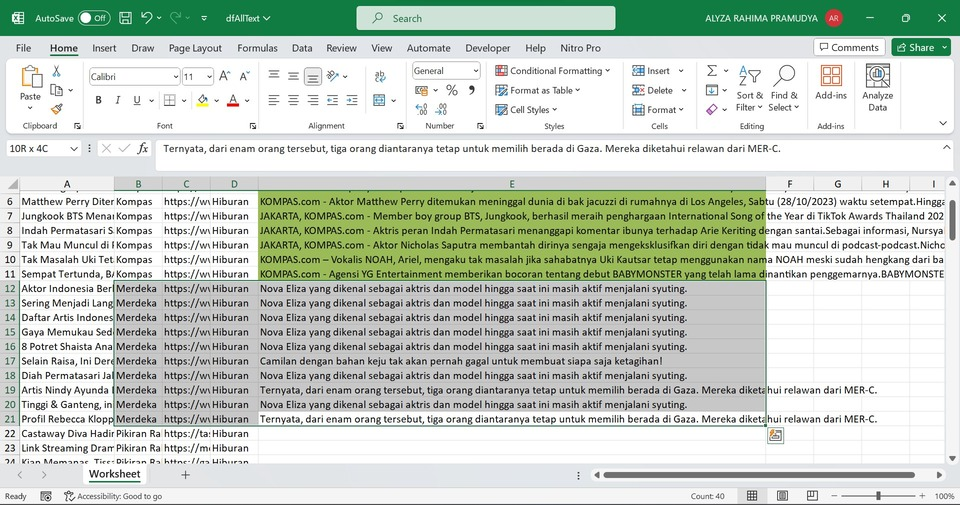

**6. Ambil konten berita seacara manual**<br>
Alhasil karena kita **hanya punya 30 berita yang berhasil di ekstrak**, maka untuk sisa 3 media tadi kita akan ambil beritanya secara manual berdasarkan link yang tertera pada file kita. Namun, karena mengambil berita secara manual untuk 30 berita per media saya rasa terlalu berat untuk saya lakukan, jadinya saya memilih **hanya mengambil 15 berita untuk masing-masing kategori (5 dari tribun, 5 dari pikiran rakyat, dan 5 nya lagi dari merdeka)**. Sehingga jika sesuai kita akan mendapatkan 25 berita untuk tiap kategori ditambah dari 10 berita per kategori yang berhasil kita ekstrak dari media kompas. Kita kemudian save datanya yang sudah mengandung 75 berita sebagai csv dengan nama dfAllWithText.csv

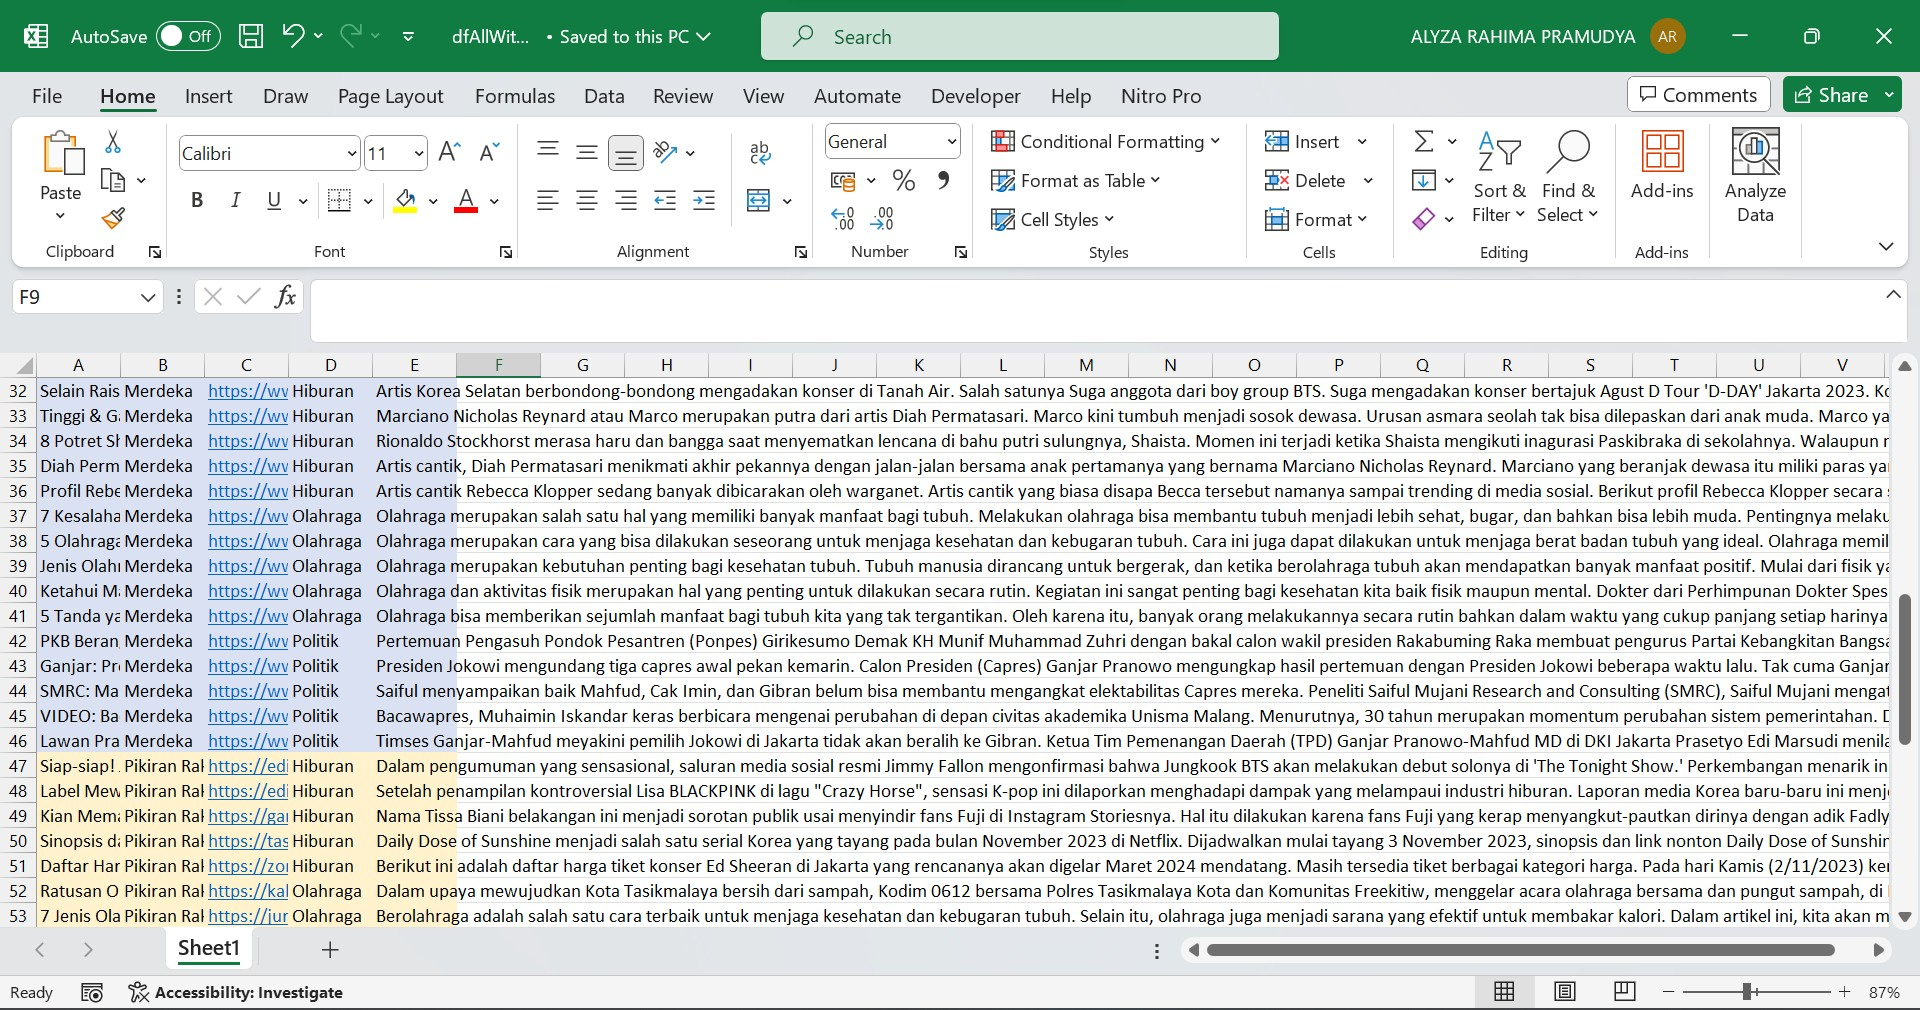

meskipun jadinya beritanya diambil manual, sisi baiknya adalah saya bisa sekalian melakukan pengecekan ulang apakah label yang diberikan sudah sesuai baik itu untuk berita yang berhasil di ekstrak dari kompas maupun berita-berita yang kita ambil manual.

# **F) Check How Many Data We Have For Each Media & Category**

---
Sekarang kita cek apakah data yang kita miliki dari hasil ekstrak menggunakan newspaper3k dan secara manual sudah sesuai dengan yang kita harapkan


**1. Load data yang sudah lengkap dengan teks berita**<br>
Pertama-tama tentu saja kita perlu load dahulu datanya dan kita simpan ke data frame dengan nama **df_all**

In [ ]:
df_all = pd.read_csv('/content/dfAllWithText.csv', sep=';')
df_all

,title,media,link,text,category
0,"Jungkook Rilis Album Solo Perdana, Golden Hala...",Kompas,https://www.kompas.com/hype/read/2023/11/03/09...,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan
1,"Tak Mau Disebut Serakah, Inara Jelaskan Alasan...",Kompas,https://www.kompas.com/hype/read/2023/11/03/08...,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan
2,"Pernah Jadi Pacar Prilly Latuconsina, Kiki TBA...",Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan
3,Polisi Ungkap Fakta Baru di Balik Kematian Mat...,Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan
4,Matthew Perry Ditemukan Meninggal di Bak Jaccu...,Kompas,https://www.kompas.com/hype/read/2023/10/29/17...,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan
...,...,...,...,...,...
70,"Kompak, 3 Parpol Lokal Aceh Dukung Anies - Gus...",Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Tiga partai politik lokal Aceh mendeklarasikan...,Politik
71,PDIP Bongkar Sederet Elite Politik yang Diduga...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,"Ketua DPP PDIP, Djarot Saiful Hidayat membocor...",Politik
72,PAN Tegaskan Presiden Jokowi Tak Pernah Campur...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,Sekretaris Jenderal (Sekjen) Partai Amanat Nas...,Politik
73,Gibran Buka Suara soal Tudingan Sengaja Pilih ...,Tribun News,https://www.tribunnews.com/mata-lokal-memilih/...,"Wali Kota Solo, Gibran Rakabuming Raka, buka s...",Politik


**2. Cek jumlah berita untuk setiap media yang memiliki data teks**<br>
Setalah kita cek datanya sudah sesuai dimana tiap media kecuali kompas memiliki banyak berita 15 sedangkan kompas 30

In [ ]:
df_all[df_all['text'].notnull()]['media'].value_counts()

Kompas            30
Merdeka           15
Pikiran Rakyat    15
Tribun News       15
Name: media, dtype: int64

**3. Cek jumlah berita untuk setiap kategori yang memiliki data teks**<br>
Setalah kita cek datanya sudah sesuai dimana tiap kategori memiliki banyak berita 25

In [ ]:
df_all[df_all['text'].notnull()]['category'].value_counts()

Hiburan     25
Olahraga    25
Politik     25
Name: category, dtype: int64

selanjutnya data yang sudah dikumpulkan ini akan kita proses sesuai dengan permintaan soal pada notebook berikut: https://colab.research.google.com/drive/1loRu8yQdaVQHfVj5lJEH1ngJPXxZjYHF?usp=sharing

**References**

---
[1] https://github.com/magusafr/scrapping_berita_indonesia<br>
[2] https://www.kaggle.com/code/raniaprillyap/scraping-berita-menggunakan-newspaper3k
